# Assignment 6

In [0]:
# Assignment 6
# Run this network.  (Links to an external site.) After training the network, whatever accuracy you get is your base accuracy. Epochs = 100
# Fix the network above:
# remove dense
# add layers required to reach RF
# fix kernel scaleup and down (1x1)
# see if all dropouts are properly placed
# follow the guidelines we discussed in the class (
# Get accuracy more than the base accuracy in less number 100 epochs. Hint, you might want to use "border_mode='same',"
# Save File as Assignment 6A
# Rewrite it again using these convolutions in the order given below:
# Normal Convolution
# Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
# Depthwise Separable Convolution
# Grouped Convolution (use 3x3, 5x5 only)
# Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
# You must use all of the 5 above at least once
# Train this new model for 50 epochs. 
# Save File as Assignment 6B
# Total Score of 600. 400 for Code (300+100), and 200 for documentation (100+100)
# Upload the github folder link which has both the files. 
 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment6')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


170500096/170498071 [==============================] - 13s 0us/step


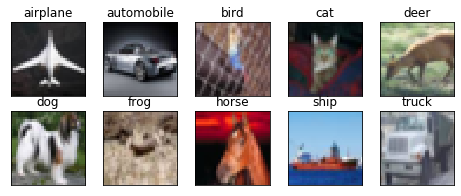

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/EVA3/EVA3-Assignment6')

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils


from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()


def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()


def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)


train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


In [45]:
from keras.layers import SeparableConv2D
import keras

# Define the model
model = Sequential()

initial_input = keras.Input(shape= (32, 32, 3))     # 32, 32, 3
input = Convolution2D(48, 3, 3, border_mode='same',activation = 'relu' )(initial_input)      #32, 32, 48

#Normal convolution
input = Convolution2D(48, 3, 3, ) (input)  # 30, 30, 48
input = BatchNormalization() (input)  # 30, 30, 48
input = Activation('relu')(input)   # 30, 30, 48
input = MaxPooling2D(pool_size = (2,2)) (input)   # 15, 15, 48


#Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
input = Convolution2D(96, 3, 1, border_mode = 'same')(input)     # 15, 15, 96
input = BatchNormalization()(input)
input = Activation('relu')(input)
input = Dropout(0.25)(input)

input = Convolution2D(96, 1, 3, border_mode = 'same' )(input)  #15, 15, 96
input = BatchNormalization()(input)
input = Activation('relu')(input)
input = Dropout(0,25)(input)


# Depthwise Separable Convolution 
input = SeparableConv2D(96, kernel_size = (3, 3), padding = 'same', activation= 'relu' )(input)     # 15, 15, 96
input = MaxPooling2D(pool_size=(2, 2)) (input)    # 7, 7, 96


# Grouped Convolution (use 3x3, 5x5 only) # Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 
input1 = Convolution2D(192, 3, 3,  border_mode = 'same', dilation_rate = (1,1))(input)   # 7, 7, 196    3,3 convolution with dilation = 1
input1 = BatchNormalization()(input1) # 7, 7, 196
input1 = Activation('relu')(input1) # 7, 7, 196

input2 = Convolution2D(192, 3, 3, border_mode= 'same', dilation_rate= (2,2)) (input)  # 7,7, 196, 3x3 convolution with dialation = 2
input2 = BatchNormalization()(input2)# 7, 7, 196
input2 = Activation('relu')(input2)# 7, 7, 196

input3 = Convolution2D(192, 3, 3, border_mode = 'same')(input)  # 7, 7, 196    with dialation = 1,1 as the default dialation is 1,1
input3 = BatchNormalization()(input3) # 7, 7, 196
input3 = Activation('relu')(input3) # 7, 7, 196

# now add input1 + input 2  Concatenate the layers of input1, 2, 3 to form a grouped convolution
input4 = keras.layers.concatenate([input1, input2, input3])  # 7, 7, 576
# input3 = keras.layers.add([input1, input2, input3])  # 7, 7, 196

# reduce the layers 
input4 = Convolution2D(192, 1, 1, border_mode = 'same')(input4)  # 7, 7, 196 
input4 = BatchNormalization()(input4)# 7, 7, 196 
input4 = Activation('relu')(input4) # 7, 7, 196 

input4 = Convolution2D(10, 3, 3, activation = 'relu')(input4)   # 5, 5, 10
input4 = MaxPooling2D(pool_size = (2,2))  (input4)   # 2, 2, 10

input4 = Convolution2D(10, 2, 2 )(input4)   # 1, 1, 10
input4 = Activation('relu')(input4)

prediction = Flatten()(input4)   # array of 10

model = keras.Model(inputs = initial_input, outputs = prediction)
model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (1, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), dilation_rate=(1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Ke

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 32, 32, 48)   1344        input_37[0][0]                   
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 30, 30, 48)   20784       conv2d_188[0][0]                 
__________________________________________________________________________________________________
batch_normalization_143 (BatchN (None, 30, 30, 48)   192         conv2d_189[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (1, 1), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2))`


## Train the Model for 50 epochs

Epoch 1/50
  3/390 [..............................] - ETA: 20s - loss: 2.1539 - acc: 0.2891

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


390/390 [==============================] - 15s 40ms/step - loss: 2.0376 - acc: 0.2576 - val_loss: 2.2581 - val_acc: 0.1311
Epoch 2/50
390/390 [==============================] - 15s 38ms/step - loss: 2.1144 - acc: 0.1920 - val_loss: 2.5174 - val_acc: 0.1064
Epoch 3/50
390/390 [==============================] - 15s 38ms/step - loss: 2.0816 - acc: 0.2100 - val_loss: 2.2970 - val_acc: 0.2029
Epoch 4/50
390/390 [==============================] - 15s 38ms/step - loss: 2.0735 - acc: 0.2278 - val_loss: 2.3051 - val_acc: 0.1336
Epoch 5/50
390/390 [==============================] - 14s 37ms/step - loss: 2.0804 - acc: 0.2223 - val_loss: 2.1015 - val_acc: 0.2168
Epoch 6/50
390/390 [==============================] - 14s 37ms/step - loss: 1.8833 - acc: 0.2948 - val_loss: 1.9740 - val_acc: 0.2959
Epoch 7/50
390/390 [==============================] - 15s 37ms/step - loss: 1.9365 - acc: 0.2875 - val_loss: 3.7967 - val_acc: 0.1000
Epoch 8/50
390/390 [==============================] - 15s 37ms/step - los

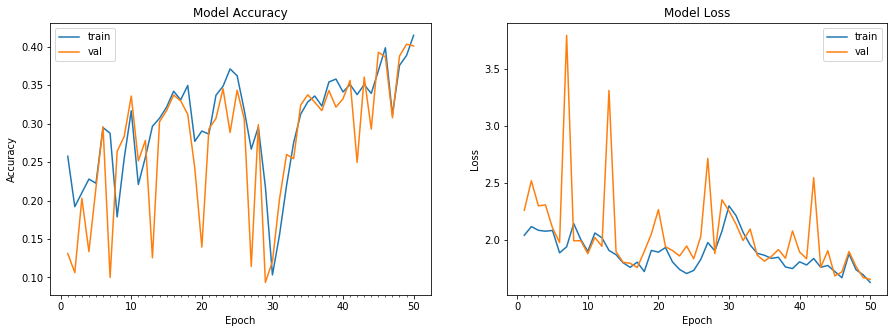

Accuracy on test data is: 40.09


In [47]:
#Training
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


### THE END ###